In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv("transaction_dataset.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [8]:
df.columns.shape[0] - 4

47

In [3]:
#Rename columns for easier access
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

#Remove weird stuff 
df = df.drop(columns=['unnamed:_0'])

#Remove duplicate accounts
print("Size = "+str(df.shape[0]))
df = df.drop_duplicates(subset=['address'])
print("Size without duplicates = "+str(df.shape[0]))

#Replace nan values by median 
df.fillna(df.median(numeric_only=True), inplace=True)

total = df.shape[0]
total_frauds = df["flag"].sum()
df.head()

Size = 9841
Size without duplicates = 9816


,index,address,flag,avg_min_between_sent_tnx,avg_min_between_received_tnx,time_diff_between_first_and_last_(mins),sent_tnx,received_tnx,number_of_created_contracts,unique_received_from_addresses,...,erc20_min_val_sent,erc20_max_val_sent,erc20_avg_val_sent,erc20_min_val_sent_contract,erc20_max_val_sent_contract,erc20_avg_val_sent_contract,erc20_uniq_sent_token_name,erc20_uniq_rec_token_name,erc20_most_sent_token_type,erc20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### fraud distribution of the dataset

#Accounts = 9816
#Flagged accounts = 2179
Percentage of flagged accounts = 22.2 %


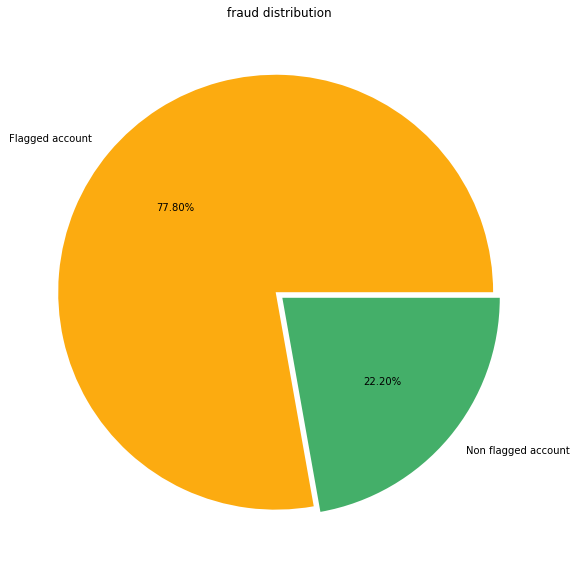

<Figure size 432x288 with 0 Axes>

In [6]:
print("#Accounts = " + str(total) + "\n" "#Flagged accounts = " + str(total_frauds))
print("Percentage of flagged accounts = " + str(round(total_frauds / total, 4) * 100) + " %")
 
pie, ax = plt.subplots(figsize=[15,10])
labels = ['Flagged account', 'Non flagged account']
colors = ['#FCAB10', '#44AF69']
plt.pie(x = df['flag'].value_counts(), labels = labels, colors = colors, explode=[0.02] * 2,  autopct='%.2f%%')
plt.title('fraud distribution')
plt.show()
plt.savefig("fraud_distribution_pie.png")

### facts about average transaction values, amounts, connections etc

In [6]:
# We might not want our model to be limited to token names. 
# I suggest we drop the columns -> 
token_cols = ['erc20_most_sent_token_type','erc20_most_rec_token_type']
df[token_cols].head()
df = df.drop(columns=token_cols)

###### IDEA (Alex)
# If our model uses token names to make its decision, new accounts with different tokens 
# will be incorrectly classified according to our training. 

# This is of course open to discussion 
#We can code  a f that classifies the token names as numerals and then we can reserve one numeral for all unknown token names. 

KeyError: "None of [Index(['erc20_most_sent_token_type', 'erc20_most_rec_token_type'], dtype='object')] are in the [columns]"

In [6]:
# Observing the columns with variances = 0
zero_var_cols = []
for col in df.columns[2:] :
    if np.var(df[col]) == 0 :
        print(col)
        zero_var_cols.append(col)
#These columns shouldn't be kept as they do not contribute to our classification problem
display(df[zero_var_cols].head(10))
df = df.drop(columns=zero_var_cols)

erc20_avg_time_between_sent_tnx
erc20_avg_time_between_rec_tnx
erc20_avg_time_between_rec_2_tnx
erc20_avg_time_between_contract_tnx
erc20_min_val_sent_contract
erc20_max_val_sent_contract
erc20_avg_val_sent_contract


,erc20_avg_time_between_sent_tnx,erc20_avg_time_between_rec_tnx,erc20_avg_time_between_rec_2_tnx,erc20_avg_time_between_contract_tnx,erc20_min_val_sent_contract,erc20_max_val_sent_contract,erc20_avg_val_sent_contract
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(df.columns)
display(df.head())

Index(['index', 'address', 'flag', 'avg_min_between_sent_tnx',
       'avg_min_between_received_tnx',
       'time_diff_between_first_and_last_(mins)', 'sent_tnx', 'received_tnx',
       'number_of_created_contracts', 'unique_received_from_addresses',
       'unique_sent_to_addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions_(including_tnx_to_create_contract',
       'total_ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'total_erc20_tnxs',
       'erc20_total_ether_received', 'erc20_total_ether_sent',
       'erc20_total_ether_sent_contract', 'erc20_uniq_sent_addr',
       'erc20_uniq_rec_addr', 'erc20_uniq_sent_addr.1',
       'erc20_uniq_rec_contract_addr', 'erc20_min_val_rec',
       'erc20_max_val_rec', 'erc20_avg_val_rec', 'erc

,index,address,flag,avg_min_between_sent_tnx,avg_min_between_received_tnx,time_diff_between_first_and_last_(mins),sent_tnx,received_tnx,number_of_created_contracts,unique_received_from_addresses,...,erc20_uniq_sent_addr.1,erc20_uniq_rec_contract_addr,erc20_min_val_rec,erc20_max_val_rec,erc20_avg_val_rec,erc20_min_val_sent,erc20_max_val_sent,erc20_avg_val_sent,erc20_uniq_sent_token_name,erc20_uniq_rec_token_name
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.0,58.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,0.0,7.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.0,8.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,0.0,11.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.0,27.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0


In [8]:
df['flag'].value_counts()
# Observing data distribution for the remaining columns
small_distr_col = []
for col in df.columns[3:] :
    if len(df[col].value_counts()) < 10:
        print(df[col].value_counts())
        print()
        small_distr_col.append(col)
#As we can see, all these columns are useless since almost no rows have different values. 
df = df.drop(columns=small_distr_col)

0.00    9814
0.02       1
0.01       1
Name: min_value_sent_to_contract, dtype: int64

0.000000    9813
0.020000       1
0.010000       1
0.046029       1
Name: max_val_sent_to_contract, dtype: int64

0.000000    9813
0.020000       1
0.010000       1
0.023014       1
Name: avg_value_sent_to_contract, dtype: int64

0.000000    9813
0.020000       1
0.010000       1
0.046029       1
Name: total_ether_sent_contracts, dtype: int64

0.0    9788
1.0      26
3.0       1
2.0       1
Name: erc20_uniq_sent_addr.1, dtype: int64



In [9]:
df.columns
df.columns.shape


Index(['index', 'address', 'flag', 'avg_min_between_sent_tnx',
       'avg_min_between_received_tnx',
       'time_diff_between_first_and_last_(mins)', 'sent_tnx', 'received_tnx',
       'number_of_created_contracts', 'unique_received_from_addresses',
       'unique_sent_to_addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'total_transactions_(including_tnx_to_create_contract',
       'total_ether_sent', 'total_ether_received', 'total_ether_balance',
       'total_erc20_tnxs', 'erc20_total_ether_received',
       'erc20_total_ether_sent', 'erc20_total_ether_sent_contract',
       'erc20_uniq_sent_addr', 'erc20_uniq_rec_addr',
       'erc20_uniq_rec_contract_addr', 'erc20_min_val_rec',
       'erc20_max_val_rec', 'erc20_avg_val_rec', 'erc20_min_val_sent',
       'erc20_max_val_sent', 'erc20_avg_val_sent',
       'erc20_uniq_sent_token_name', 'erc20_uniq_rec_token_name'],
      dtype='object')